# Analysis of taxi rides in New York City

In this notebook, we will analyse a dataset about the taxi rides taken in New York City. We will be analysing some trends over the course of x months and then see if the weather has any impact on the rides using a weather API.

# Loading packages

We will need to load some of the important packages at the beginning.
The two that we will need for sure are pandas (pd) and numpy (np).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

## Load the data

We are loading 3 number of months that will add up to more than 1 million rows. Through filtering and merging, we will reach the 1 million rows limit. However, sincee we are looking at trends, we will create one graph to see change over time.

In [3]:
jan = pd.read_csv('Data/Monthly/yellow_tripdata_2020_01.csv', low_memory=False)
feb = pd.read_csv('Data/Monthly/yellow_tripdata_2020_02.csv', low_memory=False)
mar = pd.read_csv('Data/Monthly/yellow_tripdata_2020_03.csv', low_memory=False)
apr = pd.read_csv('Data/Monthly/yellow_tripdata_2020_04.csv', low_memory=False)
may = pd.read_csv('Data/Monthly/yellow_tripdata_2020_05.csv', low_memory=False)
jun = pd.read_csv('Data/Monthly/yellow_tripdata_2020_06.csv', low_memory=False)
jul = pd.read_csv('Data/Monthly/yellow_tripdata_2020_07.csv', low_memory=False)
aug = pd.read_csv('Data/Monthly/yellow_tripdata_2020_08.csv', low_memory=False) 
sep = pd.read_csv('Data/Monthly/yellow_tripdata_2020_09.csv', low_memory=False)
oct = pd.read_csv('Data/Monthly/yellow_tripdata_2020_10.csv', low_memory=False)
nov = pd.read_csv('Data/Monthly/yellow_tripdata_2020_11.csv', low_memory=False)
dec = pd.read_csv('Data/Monthly/yellow_tripdata_2020_12.csv', low_memory=False)

 We are merging all the tables together to create one table for whole spring.

In [4]:
df = jan.append(feb).append(mar).append(apr).append(may).append(jun).append(jul).append(aug).append(sep).append(oct).append(nov).append(dec)

In [5]:
len(df.index)

24648499

This combined dataset has too many rows (we would like to have 1 million maximum). Let's do some cleaning and filtering.

### Cleaning of full data

We dropped all the rows where we had at least one missing observation. We have plenty of observations, so we will still end up with enough data.

In [6]:
df.dropna(inplace=True)

Filter to the data to only trips by vendor 1

In [7]:
df = df[df['VendorID'] == 1]

This looks better.

In [8]:
len(df.index)

7930565

Change pickup and dropoff times to datatime objects

In [9]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M')

Make a separate column which only has the date

In [10]:
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date

Look at number of rides each day in our timeframe

In [11]:
df_grouped = df.groupby('pickup_date').size().reset_index()
df_grouped.columns=['pickup_date', 'nb_trips']

In [12]:
len(df_grouped.index)

366

<AxesSubplot:xlabel='pickup_date', ylabel='nb_trips'>

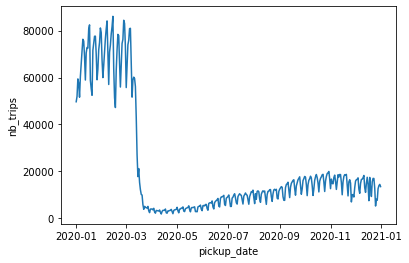

In [13]:
sns.lineplot(data = df_grouped, x = 'pickup_date', y = 'nb_trips')


#### We can already see really interesting patterns.

**1.** There is a huge drop in the number of rides between March and the other months. This is due to Covid. Last year On the 15th of March all New York City schools were ordered to close and on the 20th a state-wide stay-at-home order declared. This decreased the number of taxi rides significantly.

**2.** We already see a cyclical pattern in the data.



In [14]:
jan =df[(df["pickup_date"] >= dt.date(2020, 1, 1)) & (df["pickup_date"] <= dt.date(2020, 1, 31))]
len(jan.index)

2094439

In [15]:
feb =df[(df["pickup_date"] >= dt.date(2020, 2, 1)) & (df["pickup_date"] <= dt.date(2020, 2, 29))]
len(feb.index)

2056411

In [16]:
mar =df[(df["pickup_date"] >= dt.date(2020, 3, 1)) & (df["pickup_date"] <= dt.date(2020, 3, 31))]
len(mar.index)

988227

To be able to analyze the normal trend and patterns according taxi rides we decided to use january only as in 2020 only January and Febuary will be representative of average commuting as Covid highly effect this industry.

With these filterings we managed to bring down the cound of the observations to under 1 million, which we can use now for analysis.

## Data cleaning of only January

Now that we have the data that we will work with, we can look into what is needed in terms of data cleaning.

In [17]:
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
9,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339543,1.0,2020-01-31 23:31:46,2020-01-31 23:41:29,1.0,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
6339544,1.0,2020-01-31 23:26:26,2020-01-31 23:48:26,1.0,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
6339550,1.0,2020-01-31 23:02:57,2020-01-31 23:15:20,4.0,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
6339551,1.0,2020-01-31 23:25:53,2020-01-31 23:35:44,1.0,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


Looks like there are some columns that have NA values or somehow shorted, so we will filter those out first. After that we will filter the data by vendor ID and use just 1 so that we can include more variaty in the date (as in more time).

In [18]:
jan = jan.reset_index()
jan = jan.drop('index', axis = 1)
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,1.0,2020-01-01 00:29:01,2020-01-01 00:40:28,2.0,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1.0,2020-01-31 23:31:46,2020-01-31 23:41:29,1.0,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
2094435,1.0,2020-01-31 23:26:26,2020-01-31 23:48:26,1.0,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
2094436,1.0,2020-01-31 23:02:57,2020-01-31 23:15:20,4.0,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
2094437,1.0,2020-01-31 23:25:53,2020-01-31 23:35:44,1.0,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


In [19]:
jan.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                    float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date                      object
dtype: object

Looks like the one thing we need to change is the datetime columns. They should be transformed into actual datetime instead of objects.
We can also change the store_and_fwd_flag, payment_type,pickup and dropoff locations into a categorical since they are factors.

In [20]:
jan['store_and_fwd_flag'] = jan.store_and_fwd_flag.astype('category')
jan['payment_type'] = jan.payment_type.astype('category')
jan['PULocationID'] = jan.PULocationID.astype('category')
jan['DOLocationID'] = jan.DOLocationID.astype('category')
jan['RatecodeID'] = jan.RatecodeID.astype('category')

In [21]:
jan['VendorID'] = jan.VendorID.astype('int')
jan['passenger_count'] = jan.passenger_count.astype('int')

In [22]:
jan.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
PULocationID                   category
DOLocationID                   category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
pickup_date                      object
dtype: object

In [23]:
jan

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_date
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5,2020-01-01
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5,2020-01-01
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5,2020-01-01
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0,2020-01-01
4,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2,0.7,1.0,N,246,48,1.0,8.0,3.0,0.5,2.35,0.0,0.3,14.15,2.5,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1,2020-01-31 23:31:46,2020-01-31 23:41:29,1,1.3,1.0,N,100,233,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,2020-01-31
2094435,1,2020-01-31 23:26:26,2020-01-31 23:48:26,1,4.0,1.0,N,79,48,1.0,16.5,3.0,0.5,4.05,0.0,0.3,24.35,2.5,2020-01-31
2094436,1,2020-01-31 23:02:57,2020-01-31 23:15:20,4,2.4,1.0,N,230,236,1.0,10.5,3.0,0.5,2.15,0.0,0.3,16.45,2.5,2020-01-31
2094437,1,2020-01-31 23:25:53,2020-01-31 23:35:44,1,1.4,1.0,N,237,140,1.0,8.5,3.0,0.5,1.00,0.0,0.3,13.30,2.5,2020-01-31


Now the data looks much more organized. Everything is in the correct format and now represents something meaningful. With this data, we can now do analysis.

## Analytics

### Question 1

Questions 1 will address the first point we would like to analyse. What kind of patterns can we find in the data?
Some of the things we are considering analysing are the number of trips over the day, a week, or a month. Average distribution of the total amount over these time windows. These data split by Rate type or type of payment.

#### Creating columns for anaylsis

To be able to analyse we first need to create some additional columns.
We will extract the hours, days, and days of the week from the date.
For this we will use the pickup time since that is more presentative when trying to analyse when people need taxis.

In [24]:
jan['day'] = jan['tpep_pickup_datetime'].dt.day
jan['hour'] = jan['tpep_pickup_datetime'].dt.hour
jan['dayofweek'] = jan['tpep_pickup_datetime'].dt.day_name()

#### Create dataframes for the different time increments

Now we can create dataframes for the hour, day and the weekdays. This will show us distributions that we can later graph.

In [26]:
jan_by_hour = jan.groupby('hour').size()
jan_by_day = jan.groupby('day').size()
jan_by_dayofweek = jan.groupby('dayofweek', sort = False).size()

<AxesSubplot:xlabel='day'>

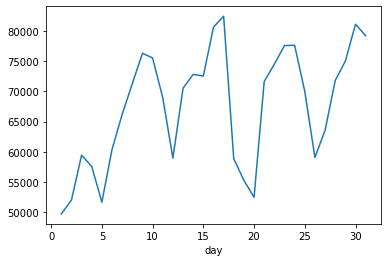

In [27]:
jan_by_day.plot()

<AxesSubplot:xlabel='dayofweek'>

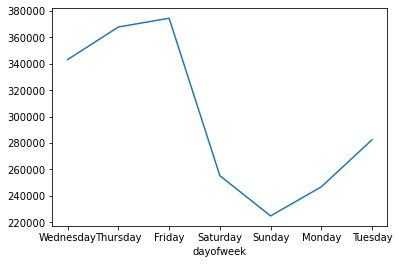

In [28]:
jan_by_dayofweek.plot()

<AxesSubplot:xlabel='hour'>

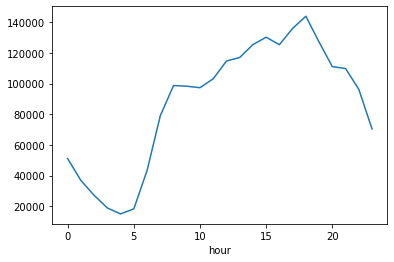

In [29]:
jan_by_hour.plot()

Looks like there is a pattern on a weekly and hourly basis but not necessarily on a monthly basis. On a weekly basis we can see that there are significantly less trips during the weekend which may indicate that people use taxis more for tasks related to work than leasure. They are the highest in Friday though so maybe on Friday people also use them to go to and come from evening events. On an hourly basis it seems that trips increase around 6AM when people start going to work. They increase even further during the day until about 4PM which is most likely people taking taxis to meeting across the city. They then drop in the evening hours when there are less people moving around the city.

In [30]:
avg_fair_by_hour = jan.groupby(['hour','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_day = jan.groupby(['day','passenger_count']).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()
avg_fair_by_dayofweek = jan.groupby(['dayofweek','passenger_count'], sort = False).agg({'fare_amount':'mean',
                                             'total_amount':'mean',
                                            'trip_distance' : 'mean'}).reset_index()

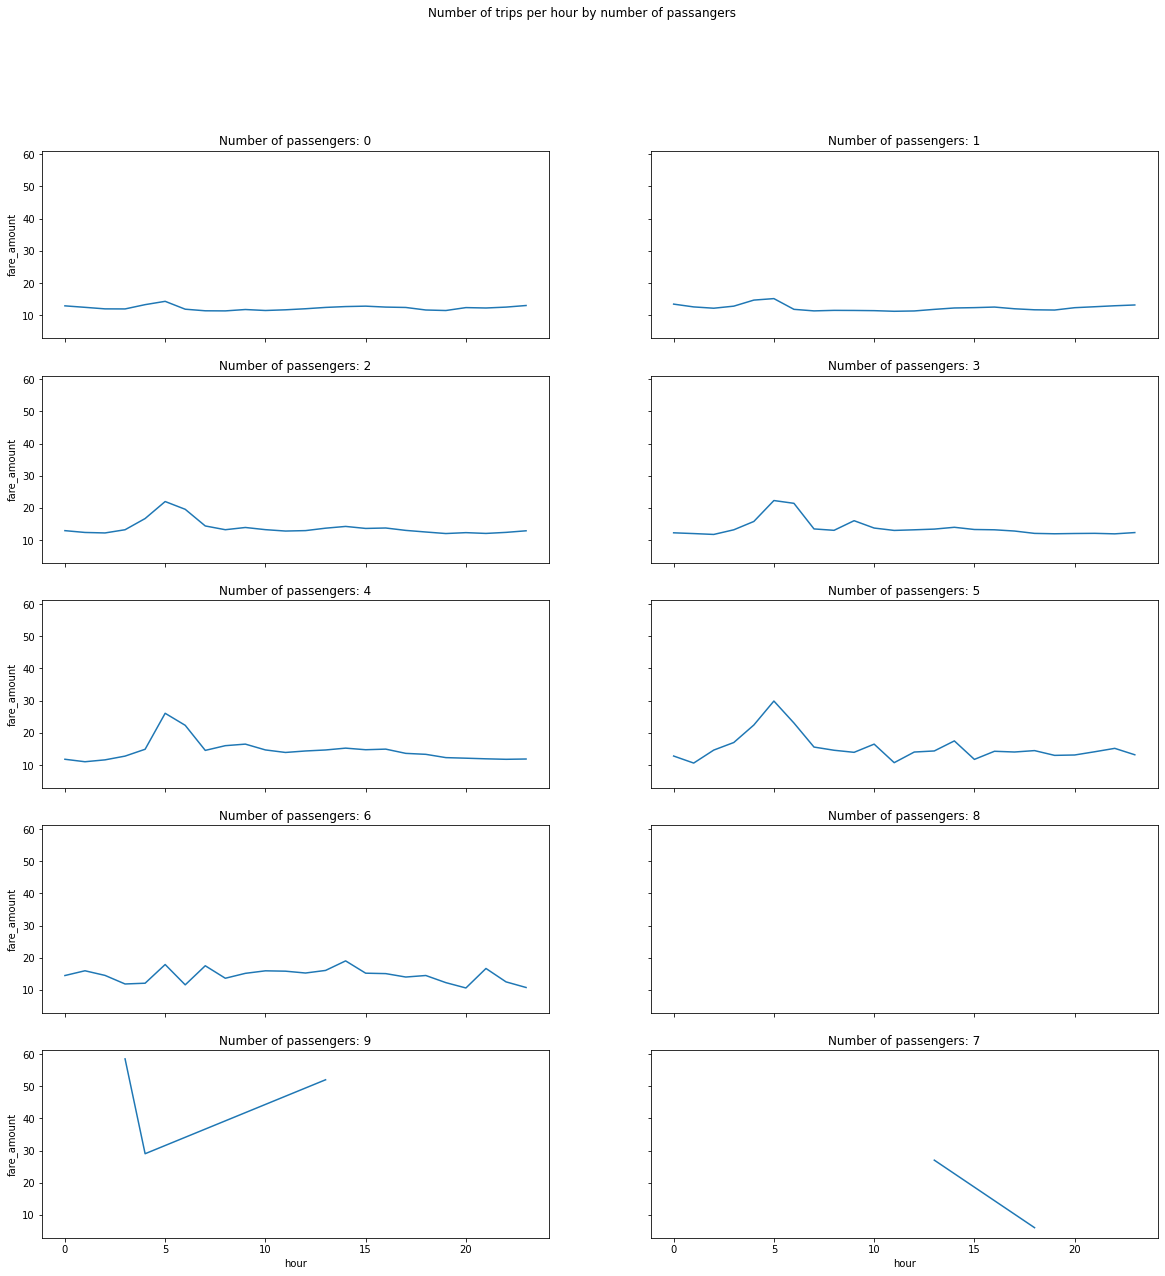

In [31]:
passenger_count = avg_fair_by_hour.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per hour by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_hour[avg_fair_by_hour['passenger_count'] == passenger],
                 x = 'hour', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Looks like trips with people with between 7 to 9 people are very rare. They seem to happen right before, during, or right after working hours so they are most likely connected to work. The fair amount jumps for all groups around 5 am which is most likely people going to work froma farther distance (maybe on company expense).Interestingly there is a lot of movement with 5 and 6 people which means people may group up for longer trip to share the fare.

<ipython-input-32-432f28a55655>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-32-432f28a55655>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-32-432f28a55655>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-32-432f28a55655>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
<ipython-input-32-432f28a55655>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenge

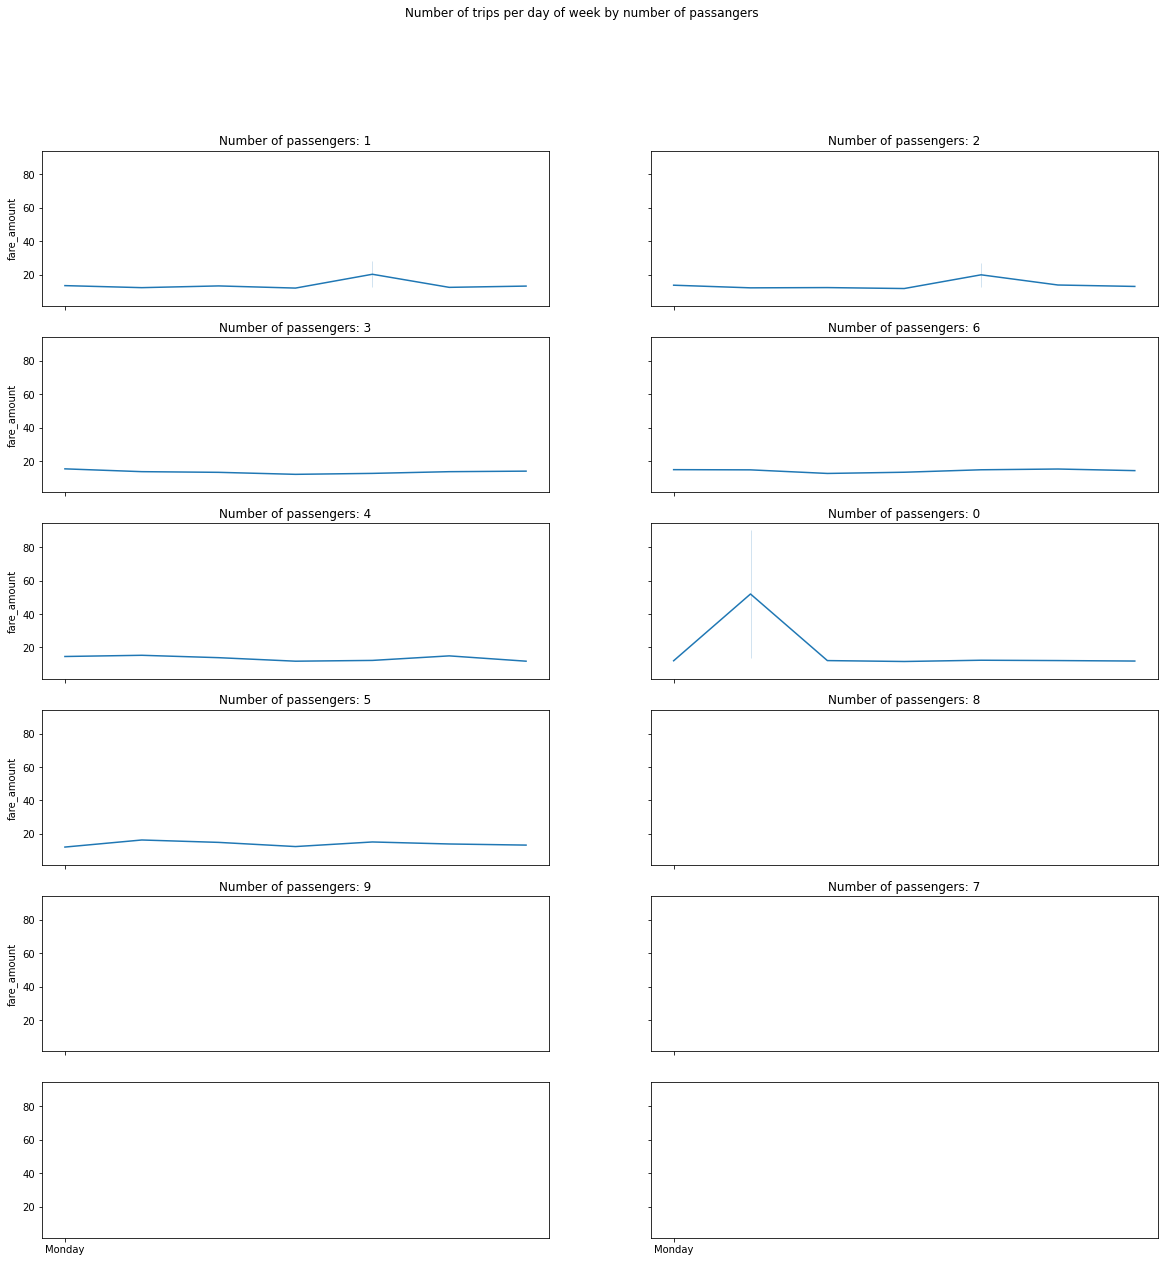

In [32]:
passenger_count = avg_fair_by_dayofweek.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2+1, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_dayofweek[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'dayofweek', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Looking like during the week there is not much change in the fair amount except for 0 passengers on a Tuesday. This would be interesting to investigate. 1 and 2 people see a slight increase on Fridays which may be because peopla re taking taxis home from an evening event that day.

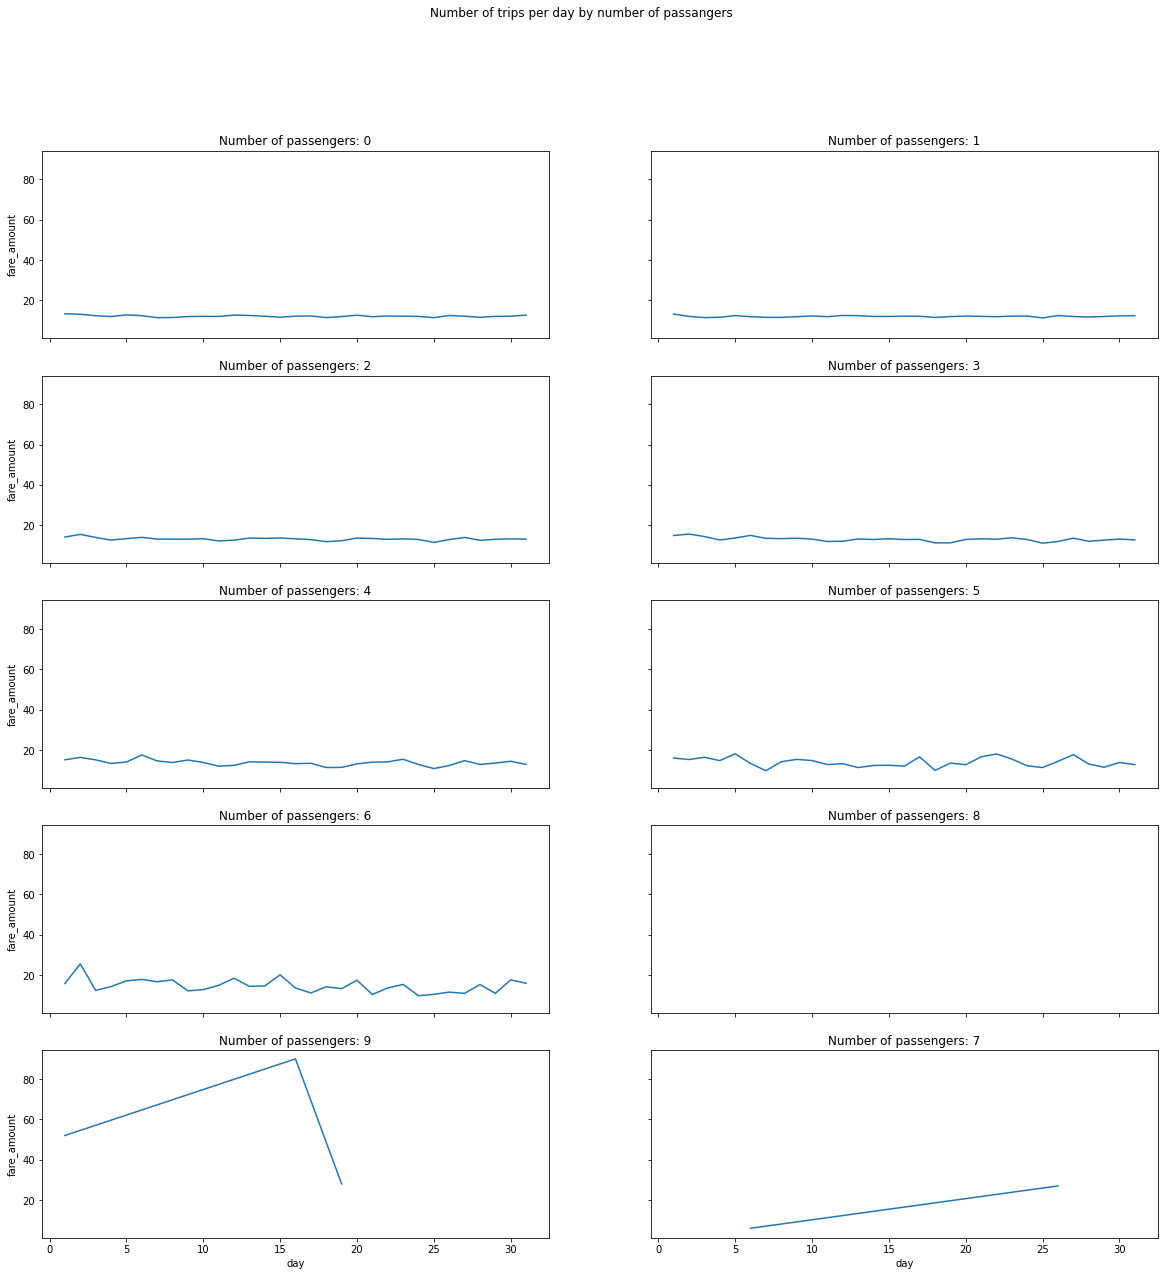

In [33]:
passenger_count = avg_fair_by_day.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day by number of passangers')
i = 0
for passenger in passenger_count:
    sns.lineplot(data = avg_fair_by_day[avg_fair_by_day['passenger_count'] == passenger],
                 x = 'day', y = 'fare_amount', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

Over the month the fair amount is pretty stable. This means that while trip numbers vary the distance these trips are do not. The 7 to 9 passenger trips show a strange pattern but that is probably because of the few amount of trips in this category.

#### Looking at different aspects

In [34]:
fare_type_vs_payment_type = jan.groupby(['RatecodeID', 'payment_type']).size().reset_index()
fare_type_vs_payment_type.columns=['RatecodeID','payment_type','nb_trips']
fare_type_vs_payment_type.drop(fare_type_vs_payment_type.tail(5).index,inplace = True)
fare_type_vs_payment_type_pivot = fare_type_vs_payment_type.pivot(index= 'RatecodeID', columns='payment_type', values='nb_trips')
fare_type_vs_payment_type_pivot

payment_type,1.0,2.0,3.0,4.0,5.0
RatecodeID,,,,,
1.0,1506943,494741,23440,8325,1
2.0,35338,8575,912,316,0
3.0,3090,855,281,89,0
4.0,904,475,92,32,0
5.0,6796,1624,1030,453,0
6.0,2,11,15,6,0


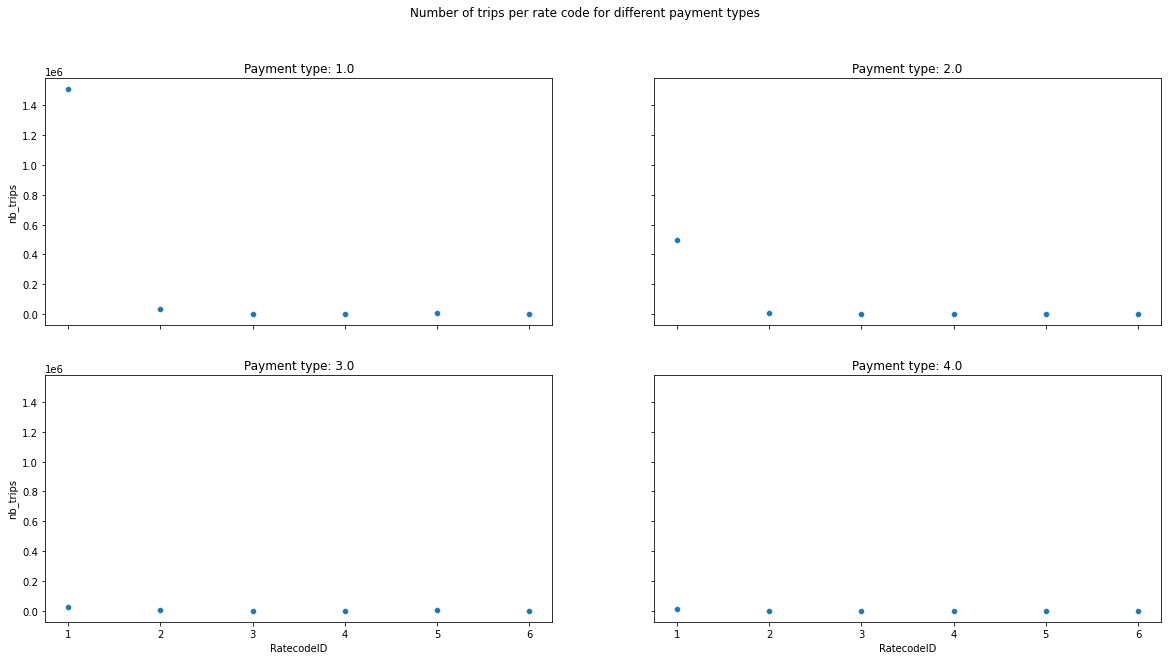

In [36]:
payment_type = [1.0, 2.0, 3.0, 4.0]

fig, axes = plt.subplots(nrows=len(payment_type)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,10))
fig.suptitle('Number of trips per rate code for different payment types')
i = 0
for payment in payment_type:
    sns.scatterplot(data = fare_type_vs_payment_type[fare_type_vs_payment_type['payment_type'] == payment],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Payment type: {}'.format(payment))
    i += 1
plt.show()

So the table shows that most trips very paid by payment type 1 (Credit card) or type 2 (cash). In the graphs we can see that there is significantly more trips for Standard rate for the two more popular payment type. The others are all about equal.

In [37]:
fare_type_vs_pass_count = jan.groupby(['RatecodeID', 'passenger_count']).size().reset_index()
fare_type_vs_pass_count.columns=['RatecodeID','passenger_count','nb_trips']
fare_type_vs_pass_count.drop(fare_type_vs_pass_count.tail(10).index,inplace = True)
fare_type_vs_pass_count_pivot = fare_type_vs_pass_count.pivot(index= 'RatecodeID', columns='passenger_count', values='nb_trips')
fare_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,7,8,9
RatecodeID,,,,,,,,,,
1.0,110103,1523118,298065,65210,34367,1656,926,2,1,2
2.0,2621,29176,10083,1964,1177,55,64,0,0,1
3.0,267,2935,780,188,135,6,4,0,0,0
4.0,79,1078,235,59,40,8,4,0,0,0
5.0,584,6882,1764,403,214,46,9,0,0,1
6.0,3,29,2,0,0,0,0,0,0,0


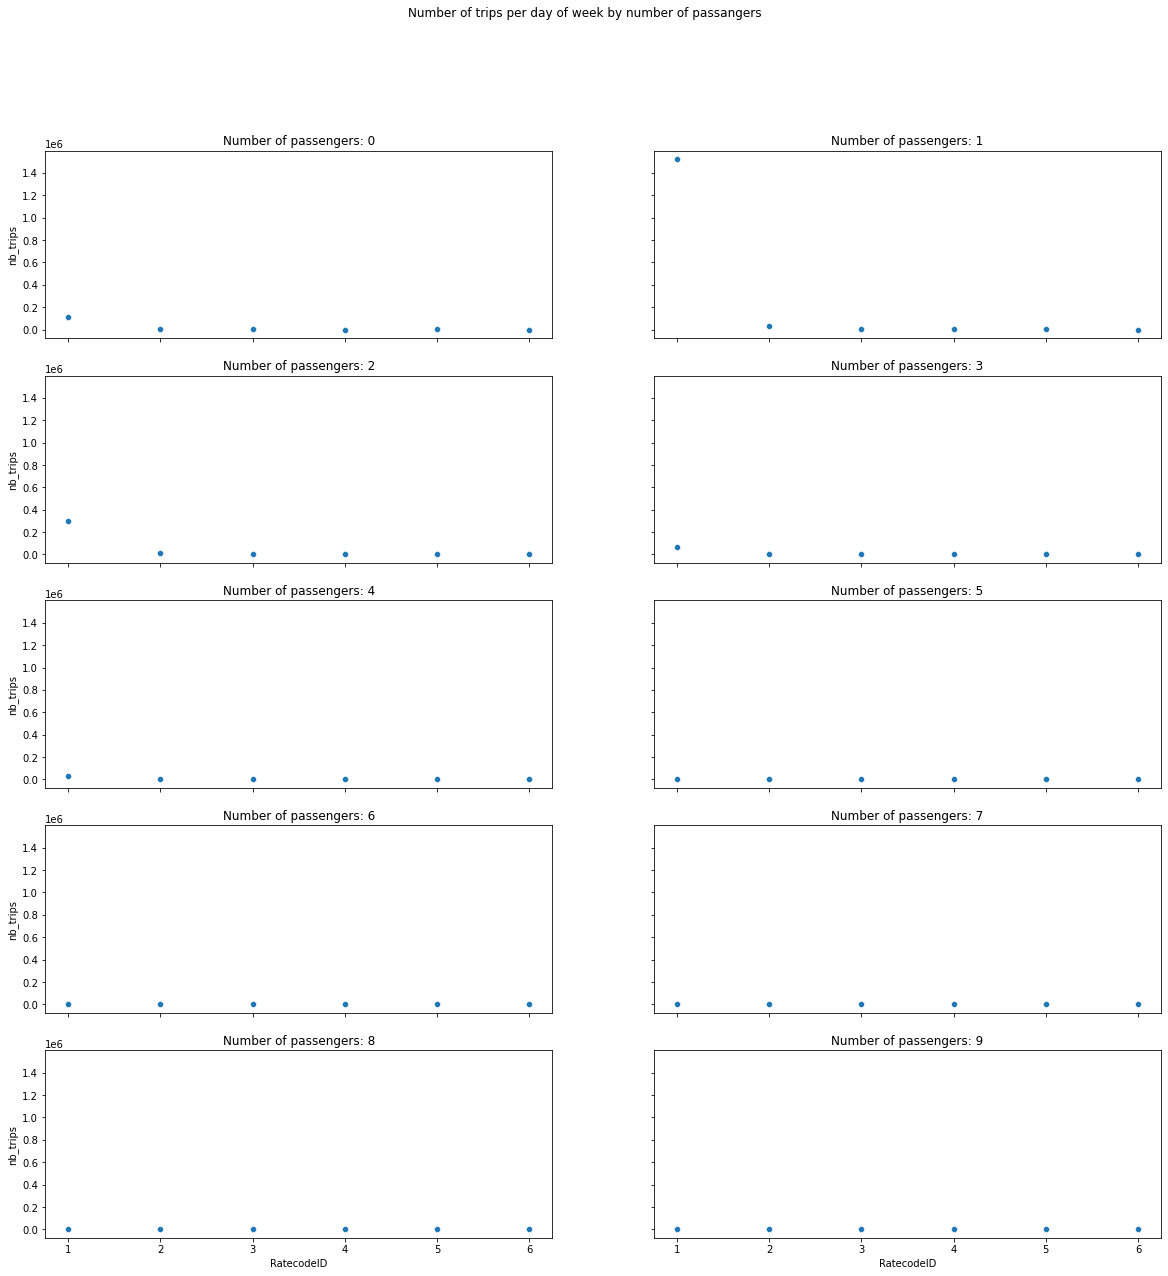

In [41]:
passenger_count = fare_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = fare_type_vs_pass_count[fare_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'RatecodeID', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

The table clearly shows that most trips taken are Standard Fare. The one significant thing we can see in these graphs that with 1 people trips are almost always Standart Rate trips. There is a small spike for 0 and 2 passengers as well but they are more balanced.

In [39]:
payment_type_vs_pass_count = jan.groupby(['payment_type', 'passenger_count']).size().reset_index()
payment_type_vs_pass_count.columns=['payment_type','passenger_count','nb_trips']
payment_type_vs_pass_count_pivot = payment_type_vs_pass_count.pivot(index='payment_type', columns='passenger_count', values='nb_trips')
payment_type_vs_pass_count_pivot

passenger_count,0,1,2,3,4,5,6,7,8,9
payment_type,,,,,,,,,,
1.0,82961,1181042,220582,46137,20550,1152,705,1,1,3
2.0,28227,356094,85821,20624,14709,565,256,1,0,1
3.0,1892,19486,3143,751,455,33,25,0,0,0
4.0,650,6612,1385,312,219,22,21,0,0,0
5.0,0,1,0,0,0,0,0,0,0,0


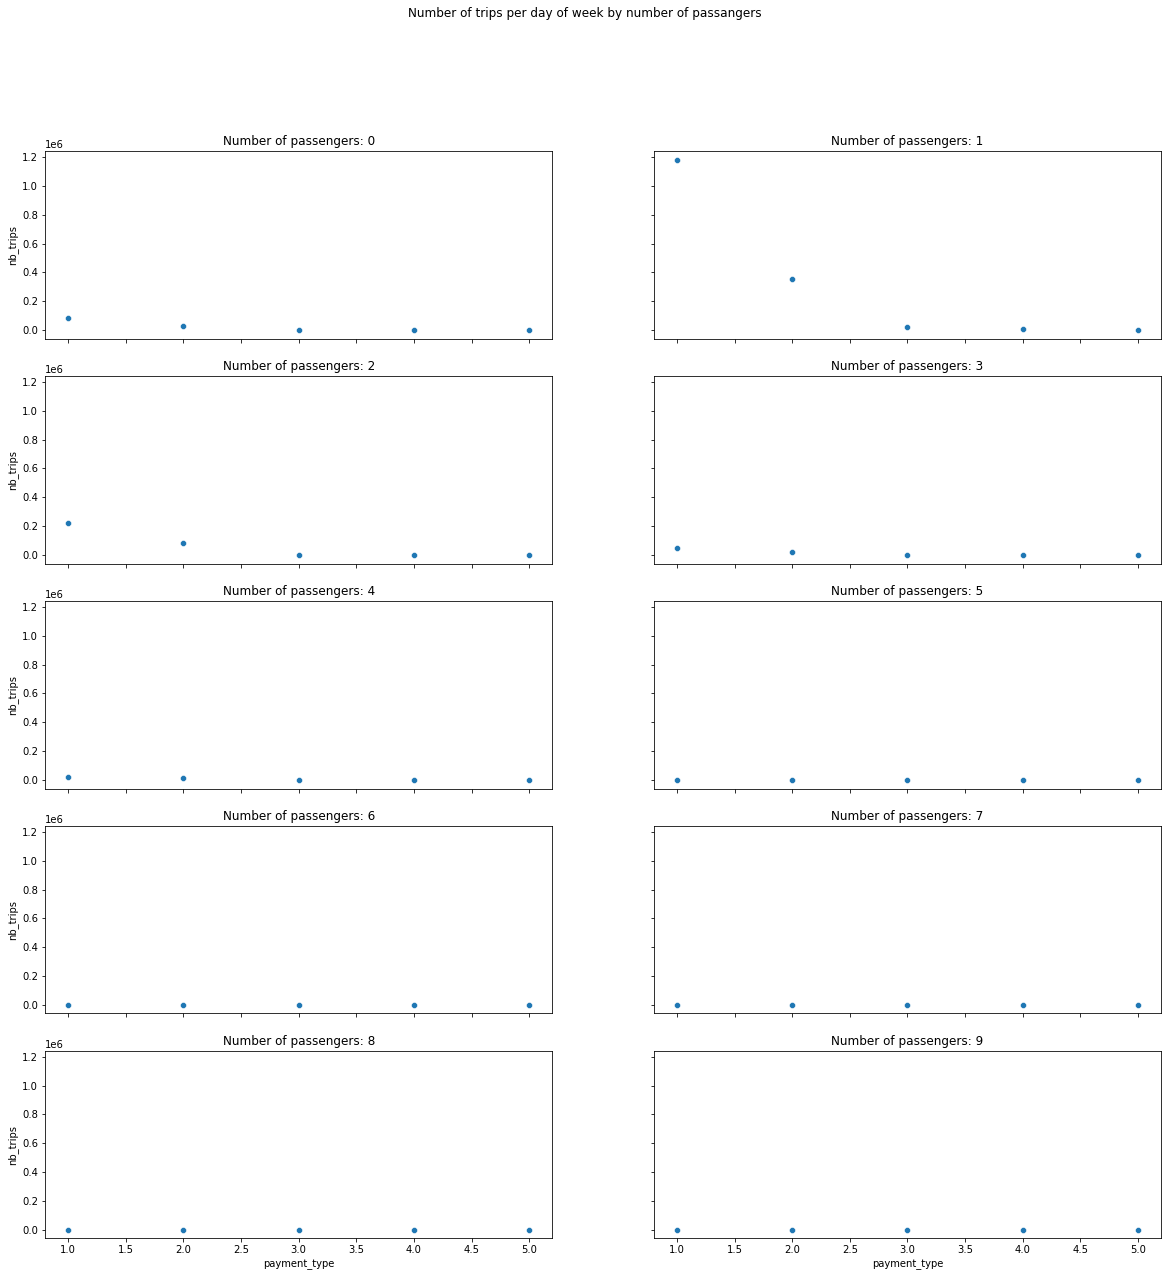

In [40]:
passenger_count = payment_type_vs_pass_count.passenger_count.unique()

fig, axes = plt.subplots(nrows=len(passenger_count)//2, ncols=2, sharex = True, sharey = True,
                         figsize=(20,20))
fig.suptitle('Number of trips per day of week by number of passangers')
i = 0
for passenger in passenger_count:
    sns.scatterplot(data = payment_type_vs_pass_count[payment_type_vs_pass_count['passenger_count'] == passenger],
                 x = 'payment_type', y = 'nb_trips', ax=axes[i//2, i%2],).set_title('Number of passengers: {}'.format(passenger))
    i += 1
plt.show()

With 1 passenger there is a large discrapancy between Card, Cash and all the other methods. This same change can be seen more reduced with 0 and 2 passengers. The others seem to not have a prefered number of payment. This could also be because there is less data on those points so its not as indicative.

# Question 2

Now that we have looked at the data and determined the patterns in it, we can move on to question 2. This question deals with how the weather affects the taxi rides.
We will be trying to answer if different weather conditions affect the number of taxi rides in a day.

## API
To answer our second question we will need weather data. We will get this trhourg an API.

In [42]:
import requests

Set the params for the API, here we will need to set for which city we would like to get the data and from when till when.

In [43]:
city = "New York"
from_date = "2020-1-1"
to_date = "2020-3-31"

Get the data

In [45]:
resp = requests.get("https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/{}/{}/{}?unitGroup=metric&key=BA2ZMU7Z5G69FTJEAEVC328WT&include=obs%2Cstats%2Calerts".format(city.replace(' ', "%20"), 
                                                                                          from_date, to_date))
type(resp)

requests.models.Response

Check if we managed to get the data

In [46]:
resp.text

'{"queryCost":91,"latitude":40.7146,"longitude":-74.0071,"resolvedAddress":"New York, NY, United States","address":"New York","timezone":"America/New_York","tzoffset":-5.0,"days":[{"datetime":"2020-01-01","datetimeEpoch":1577854800,"tempmax":5.0,"tempmin":1.7,"temp":3.6,"feelslikemax":2.8,"feelslikemin":-2.8,"feelslike":-0.1,"dew":-4.2,"humidity":56.88,"precip":1.43,"precipprob":null,"precipcover":4.17,"preciptype":null,"snow":0.0,"snowdepth":0.0,"windgust":47.9,"windspeed":30.9,"winddir":270.4,"pressure":1008.1,"cloudcover":36.7,"visibility":16.0,"solarradiation":null,"solarenergy":null,"sunrise":"07:20:08","sunriseEpoch":1577881208,"sunset":"16:38:55","sunsetEpoch":1577914735,"moonphase":0.17,"conditions":"Rain, Partially cloudy","icon":"rain","stations":["72505394728","72055399999","KLGA","KJRB","KNYC","72503014732"],"source":"obs","normal":{"tempmax":[-5.7,5.6,15.9],"tempmin":[-12.9,-0.3,7.2],"feelslike":[-17.9,5.6,15.9],"precip":[0.0,4.5,38.8],"humidity":[39.6,62.2,91.8],"snowdept

### Parsing the response string

Now that we have the data we will parse it to have a more understandable format

In [47]:
import json

In [48]:
weather = json.loads(resp.text)
weather

{'queryCost': 91,
 'latitude': 40.7146,
 'longitude': -74.0071,
 'resolvedAddress': 'New York, NY, United States',
 'address': 'New York',
 'timezone': 'America/New_York',
 'tzoffset': -5.0,
 'days': [{'datetime': '2020-01-01',
   'datetimeEpoch': 1577854800,
   'tempmax': 5.0,
   'tempmin': 1.7,
   'temp': 3.6,
   'feelslikemax': 2.8,
   'feelslikemin': -2.8,
   'feelslike': -0.1,
   'dew': -4.2,
   'humidity': 56.88,
   'precip': 1.43,
   'precipprob': None,
   'precipcover': 4.17,
   'preciptype': None,
   'snow': 0.0,
   'snowdepth': 0.0,
   'windgust': 47.9,
   'windspeed': 30.9,
   'winddir': 270.4,
   'pressure': 1008.1,
   'cloudcover': 36.7,
   'visibility': 16.0,
   'solarradiation': None,
   'solarenergy': None,
   'sunrise': '07:20:08',
   'sunriseEpoch': 1577881208,
   'sunset': '16:38:55',
   'sunsetEpoch': 1577914735,
   'moonphase': 0.17,
   'conditions': 'Rain, Partially cloudy',
   'icon': 'rain',
   'stations': ['72505394728',
    '72055399999',
    'KLGA',
    'KJRB

In [49]:
weather.keys()

dict_keys(['queryCost', 'latitude', 'longitude', 'resolvedAddress', 'address', 'timezone', 'tzoffset', 'days', 'stations'])

The data we need in under the key **'days'**

In [50]:
weather['days']

[{'datetime': '2020-01-01',
  'datetimeEpoch': 1577854800,
  'tempmax': 5.0,
  'tempmin': 1.7,
  'temp': 3.6,
  'feelslikemax': 2.8,
  'feelslikemin': -2.8,
  'feelslike': -0.1,
  'dew': -4.2,
  'humidity': 56.88,
  'precip': 1.43,
  'precipprob': None,
  'precipcover': 4.17,
  'preciptype': None,
  'snow': 0.0,
  'snowdepth': 0.0,
  'windgust': 47.9,
  'windspeed': 30.9,
  'winddir': 270.4,
  'pressure': 1008.1,
  'cloudcover': 36.7,
  'visibility': 16.0,
  'solarradiation': None,
  'solarenergy': None,
  'sunrise': '07:20:08',
  'sunriseEpoch': 1577881208,
  'sunset': '16:38:55',
  'sunsetEpoch': 1577914735,
  'moonphase': 0.17,
  'conditions': 'Rain, Partially cloudy',
  'icon': 'rain',
  'stations': ['72505394728',
   '72055399999',
   'KLGA',
   'KJRB',
   'KNYC',
   '72503014732'],
  'source': 'obs',
  'normal': {'tempmax': [-5.7, 5.6, 15.9],
   'tempmin': [-12.9, -0.3, 7.2],
   'feelslike': [-17.9, 5.6, 15.9],
   'precip': [0.0, 4.5, 38.8],
   'humidity': [39.6, 62.2, 91.8],
   

Let's check if we actually got the data for all the days - *for this we look at the first and last day in our data*

In [51]:
weather['days'][0]['datetime']

'2020-01-01'

In [52]:
weather['days'][-1]['datetime']

'2020-03-31'

We can also check the length of the data set - *we should have 91 rows in our dataset, as there were 91 days in 2020 January, February and March*

In [53]:
len(weather['days'])

91

Everything seems to be in order

### Transform data to a dataframe

In [54]:
weather_df = pd.DataFrame(weather['days'])
weather_df

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,sunsetEpoch,moonphase,conditions,icon,stations,source,normal,hours,tzoffset
0,2020-01-01,1577854800,5.0,1.7,3.6,2.8,-2.8,-0.1,-4.2,56.88,...,16:38:55,1577914735,0.17,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-5.7, 5.6, 15.9], 'tempmin': [-12...",None,NaN
1,2020-01-02,1577941200,8.9,0.7,4.8,7.7,-3.5,2.0,-2.4,60.21,...,16:39:46,1578001186,0.22,Rain,rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-4.3, 3.9, 10.9], 'tempmin': [-12...",None,NaN
2,2020-01-03,1578027600,8.4,6.7,7.6,7.3,4.9,6.2,5.0,83.95,...,16:40:38,1578087638,0.26,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-6.7, 3.4, 14.3], 'tempmin': [-12...",None,NaN
3,2020-01-04,1578114000,9.4,6.7,8.2,9.4,5.6,7.4,7.2,93.49,...,16:41:32,1578174092,0.31,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-2.8, 4.5, 13.9], 'tempmin': [-12...",None,NaN
4,2020-01-05,1578200400,7.1,2.8,4.6,6.6,-0.5,2.5,-4.3,52.98,...,16:42:27,1578260547,0.36,"Snow, Partially cloudy",snow,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [-6.3, 4.4, 16.9], 'tempmin': [-11...",None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2020-03-27,1585281600,21.0,10.0,14.3,15.5,1.0,7.7,3.1,52.18,...,19:16:10,1585350970,0.04,Clear,clear-day,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [4.7, 11.2, 25.1], 'tempmin': [-5....",None,-4.0
87,2020-03-28,1585368000,12.8,7.8,9.3,21.0,10.0,14.3,2.9,67.86,...,19:17:13,1585437433,0.07,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [4.4, 11.6, 19.2], 'tempmin': [-2....",None,-4.0
88,2020-03-29,1585454400,8.3,7.2,7.9,12.8,4.1,7.2,6.8,92.80,...,19:18:16,1585523896,0.11,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [7.2, 12.9, 20.1], 'tempmin': [-3....",None,-4.0
89,2020-03-30,1585540800,10.0,6.6,8.3,5.5,2.7,4.4,6.0,85.17,...,19:19:19,1585610359,0.15,"Rain, Partially cloudy",rain,"[72505394728, 72055399999, KLGA, KJRB, KNYC, 7...",obs,"{'tempmax': [5.7, 13.0, 21.7], 'tempmin': [-2....",None,-4.0


Let's drop some colums that we don't find interesting

In [55]:
weather_df.drop(['datetimeEpoch', 'solarradiation', 'solarenergy','sunriseEpoch','sunsetEpoch' ,'stations', 'source', 'normal', 'hours', 'tzoffset', 'icon','precipprob', 'preciptype', 'precipcover', 'windgust', 'winddir'], axis='columns', inplace=True)


Check the data types

In [56]:
weather_df.dtypes

datetime         object
tempmax         float64
tempmin         float64
temp            float64
feelslikemax    float64
feelslikemin    float64
feelslike       float64
dew             float64
humidity        float64
precip          float64
snow            float64
snowdepth       float64
windspeed       float64
pressure        float64
cloudcover      float64
visibility      float64
sunrise          object
sunset           object
moonphase       float64
conditions       object
dtype: object

Most of the columns have appropriate data types, there are only 3 coulumns that are currently objects but tey should be datetimes.

Change datetime to datetime format for the merge

In [57]:
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'], format='%Y-%m-%d')

In [58]:
weather_df['sunrise'] = pd.to_datetime(weather_df['sunrise'], format='%H:%M:%S')
weather_df['sunset'] = pd.to_datetime(weather_df['sunset'], format='%H:%M:%S')

Now they look fine

In [59]:
weather_df.dtypes

datetime        datetime64[ns]
tempmax                float64
tempmin                float64
temp                   float64
feelslikemax           float64
feelslikemin           float64
feelslike              float64
dew                    float64
humidity               float64
precip                 float64
snow                   float64
snowdepth              float64
windspeed              float64
pressure               float64
cloudcover             float64
visibility             float64
sunrise         datetime64[ns]
sunset          datetime64[ns]
moonphase              float64
conditions              object
dtype: object

Export the data to csv

In [60]:
weather_df.to_csv("C:/Users/MViki/Documents/CEU/Winter_semester/Coding_3/Term_project/Python_Final_Project/Data/Weather_data_jan-mar.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/MViki/Documents/CEU/Winter_semester/Coding_3/Term_project/Python_Final_Project/Data/Weather_data_jan-mar.csv'

## Create merged file

In [61]:
jan['pickup_date'] = pd.to_datetime(jan['pickup_date'], format='%Y-%m-%d')

We will use the dates to merge the two data sets

In [62]:
df_2 = pd.merge(jan, weather_df, how='left', left_on="pickup_date", right_on="datetime")
df_2

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,snow,snowdepth,windspeed,pressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1.0,N,238,239,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1.0,N,239,238,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1.0,N,238,238,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1.0,N,238,151,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
4,1,2020-01-01 00:29:01,2020-01-01 00:40:28,2,0.7,1.0,N,246,48,1.0,...,0.0,0.0,30.9,1008.1,36.7,16.0,1900-01-01 07:20:08,1900-01-01 16:38:55,0.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2094434,1,2020-01-31 23:31:46,2020-01-31 23:41:29,1,1.3,1.0,N,100,233,2.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094435,1,2020-01-31 23:26:26,2020-01-31 23:48:26,1,4.0,1.0,N,79,48,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094436,1,2020-01-31 23:02:57,2020-01-31 23:15:20,4,2.4,1.0,N,230,236,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"
2094437,1,2020-01-31 23:25:53,2020-01-31 23:35:44,1,1.4,1.0,N,237,140,1.0,...,0.0,0.0,12.6,1026.0,44.7,15.8,1900-01-01 07:07:26,1900-01-01 17:11:53,0.18,"Rain, Partially cloudy"


In [63]:
df_2["dayofweek"] = pd.to_datetime(df_2["tpep_pickup_datetime"]).dt.dayofweek
df_2["weekend"] = df_2["dayofweek"].apply(lambda x: 'True' if x in [5, 6] else 'False')

## Analysis

Lets create a dataframe that we can use for plotting. For this we group the data by day and include other variables we would like to plot.

In [64]:
plot_wth = df_2.groupby(["day", "temp", "tempmin", "tempmax", "feelslike", "precip", "conditions", "weekend"]).size().reset_index().rename(columns ={0:'num_rides'})
plot_wth

,day,temp,tempmin,tempmax,feelslike,precip,conditions,weekend,num_rides
0,1,3.6,1.7,5.0,-0.1,1.43,"Rain, Partially cloudy",False,49682
1,2,4.8,0.7,8.9,2.0,0.99,Rain,False,51969
2,3,7.6,6.7,8.4,6.2,3.41,"Rain, Partially cloudy",False,59424
3,4,8.2,6.7,9.4,7.4,4.11,"Rain, Partially cloudy",True,57549
4,5,4.6,2.8,7.1,2.5,0.00,"Snow, Partially cloudy",True,51628
5,6,3.9,0.6,7.2,0.5,1.48,"Snow, Partially cloudy",False,60366
6,7,4.7,3.3,6.7,2.4,0.00,Clear,False,66188
7,8,2.5,-0.7,6.6,-0.8,0.00,Clear,False,71281
8,9,-0.6,-3.4,2.1,-3.7,0.00,Clear,False,76318
9,10,6.5,1.1,11.7,4.3,0.00,Partially cloudy,False,75536


In [1]:
# Build interactive plots with bokeh
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool
output_notebook()

Loading BokehJS ...

First let's look at how the number of rides change as the daily average temperature changes. On this chart all days are represented by one circle, if you hover over them you can see what day it is and we also color coded if a day was a weekend or a weekday, as we already saw that there is a huge difference in the number of rides between them. If you click on weekend weekday legend you can also highligh the chosen category.

In [ ]:
p = figure( plot_width=600, plot_height=400)

p.title.text = 'How temperature effects number of rides'


wd_df = plot_wth[plot_wth['weekend']== "False"]
source = ColumnDataSource(wd_df)

p.scatter(x= 'temp',
          y= 'num_rides',
          color='darkmagenta', alpha=0.8, legend_label='weekday',
          muted_color='darkmagenta', muted_alpha=0.4,
          marker='circle', size=15,
          source = source)



hover = HoverTool(tooltips=[("This is March", "@day")])



we_df = plot_wth[plot_wth['weekend']== "True"]
source = ColumnDataSource(we_df)

p.scatter(x= 'temp',
          y= 'num_rides',
          color='lightseagreen', alpha=0.9, legend_label='weekend',
          muted_color='lightseagreen', muted_alpha=0.4,
          marker='circle', size=15,
          source = source)

p.add_tools(hover)
p.legend.click_policy="mute"
p.legend.location = "top_right"

show(p)

We can also look at the feelslike temperature and if we find anything different. The two graphs show really similar patterns as they should.

In [ ]:
p = figure( plot_width=600, plot_height=400)

p.title.text = 'How the feelslike temperature effects number of rides'


wd_df = plot_wth[plot_wth['weekend']== "False"]
source = ColumnDataSource(wd_df)

p.scatter(x= 'feelslike',
          y= 'num_rides',
          color='darkmagenta', alpha=0.8, legend_label='weekday',
          muted_color='darkmagenta', muted_alpha=0.4,
          marker='circle', size=15,
          source = source)



hover = HoverTool(tooltips=[("This is March", "@day")])



we_df = plot_wth[plot_wth['weekend']== "True"]
source = ColumnDataSource(we_df)

p.scatter(x= 'feelslike',
          y= 'num_rides',
          color='lightseagreen', alpha=0.9, legend_label='weekend',
          muted_color='lightseagreen', muted_alpha=0.4,
          marker='circle', size=15,
          source = source)

p.add_tools(hover)
p.legend.click_policy="mute"
p.legend.location = "top_right"

show(p)

## Trends

From the above charts we cannot conclude anything relevant, so lets look at trends in the data. For this we calculated the average number of rips on day with the same temperature or precip levels.

### Temperature and average number of rides
It seems that there is a negative association between the temperature and the number of trips, meaning that if the weather is warmer less people use the taxis, probably because they rather walk or use other methods of transport.
Comparing the trend on weekends and weekdays show this negative pattern in case of weekdays but the opposite for weekends. The trend for the weekends is not really representative alone as there are only 8 observations. 

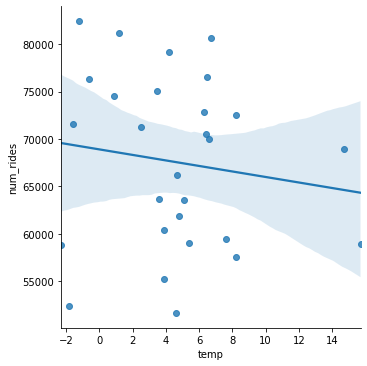

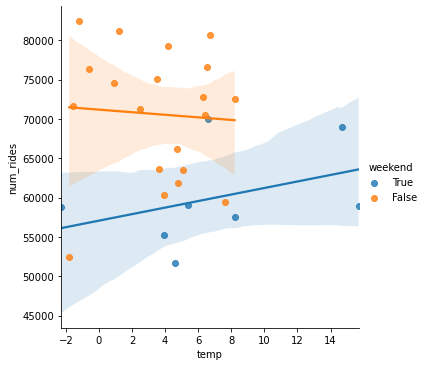

In [197]:
plot = plot_wth.groupby(["temp", "weekend"]).mean("num_rides").reset_index()
sns.lmplot(data=plot, x="temp", y="num_rides")
sns.lmplot(data=plot, x="temp", y="num_rides", hue="weekend")

### Feelslike temperature and number of rides
The feelslike temperature effect the number of rides the same way as the actual measured temperature.

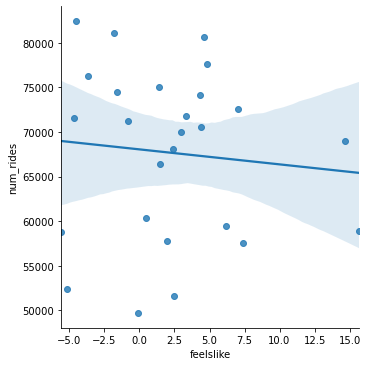

In [220]:
plot = plot_wth.groupby("feelslike").mean("num_rides").reset_index()
sns.lmplot(data=plot, x="feelslike", y="num_rides")

### Minimum temperature and average number of rides
The negative pattern is even more visible in case of the minimum temperature. So when the minimum temperature of a given day is lower more people decide to travel by taxi.

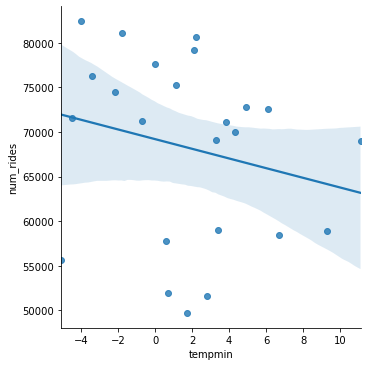

In [183]:
plot = plot_wth.groupby("tempmin").mean("num_rides").reset_index()
sns.lmplot(data=plot, x="tempmin", y="num_rides")

### Maximum temperature and average number of rides
Maximum temperature on a day does not seem to effect the nuber of rides.

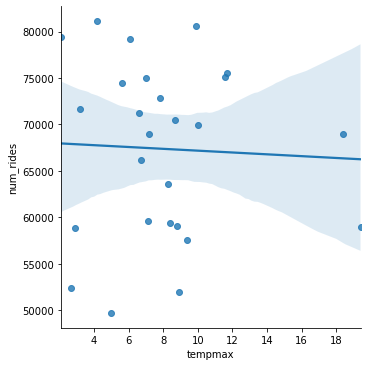

In [196]:
plot = plot_wth.groupby("tempmax").mean("num_rides").reset_index()
sns.lmplot(data=plot, x="tempmax", y="num_rides")

### Precip and number of rides
We assumed that higher amount of precip would lead to higher number of rides, but our data shows there is no connection between the two. (We are only looking ar one month so with including more this could change)

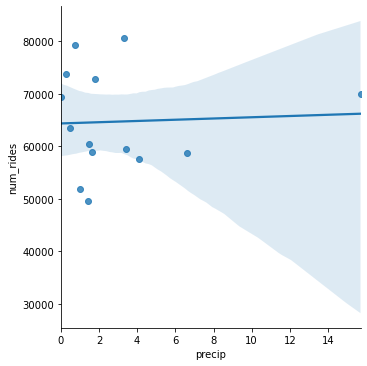

In [205]:
plot = plot_wth.groupby("precip").mean("num_rides").reset_index()
sns.lmplot(data=plot, x="precip", y="num_rides")

### Weather condition and number of trips
Most rides happen when the weather is clear or just a little bit cloudy and the number of rides is the smallest when it is snowing of raining. Probably people stay at home when the weather is bad and thus use the taxis less.

<AxesSubplot:xlabel='conditions', ylabel='num_rides'>

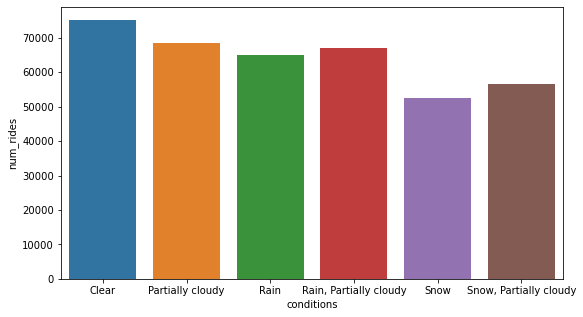

In [217]:
fig, ax = plt.subplots(figsize=(9, 5))
plot = plot_wth.groupby("conditions").mean("num_rides").reset_index()
sns.barplot(data=plot, x="conditions", y="num_rides", ax=ax)

We also had a look if temperature effect the total amount spent, but did not find any interesting pattern. 

In [ ]:
sns.lmplot(data=df_2, x="temp", y="total_amount")

# Extra - Clustering
We decided to look at clustering as an additional exercise. We were interested if we can group tipical taxi rides and thus passengers and their aims.

Create data frame to use 

In [65]:
jan["dayofweek"] = pd.to_datetime(jan["tpep_pickup_datetime"]).dt.dayofweek

In [66]:
clust = jan[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'total_amount',
             'hour', "dayofweek"]]
clust

,passenger_count,trip_distance,fare_amount,extra,tip_amount,total_amount,hour,dayofweek
0,1,1.2,6.0,3.0,1.47,11.27,0,2
1,1,1.2,7.0,3.0,1.50,12.30,0,2
2,1,0.6,6.0,3.0,1.00,10.80,0,2
3,1,0.8,5.5,0.5,1.36,8.16,0,2
4,2,0.7,8.0,3.0,2.35,14.15,0,2
...,...,...,...,...,...,...,...,...
2094434,1,1.3,8.0,3.0,0.00,11.80,23,4
2094435,1,4.0,16.5,3.0,4.05,24.35,23,4
2094436,4,2.4,10.5,3.0,2.15,16.45,23,4
2094437,1,1.4,8.5,3.0,1.00,13.30,23,4


Import packages

In [67]:
from sklearn import datasets
from sklearn.preprocessing import scale # for scaling
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from itertools import combinations
from collections import Counter
import matplotlib

Define functions

In [68]:
def draw_cluster_plot(clust, estimator, figsize=(20,40), cmap_name='summer'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(clust.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//3,ncols=3, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        clust.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//3, i%3],colorbar=False)
        i += 1
    plt.show()
    

def fit_kmeans(data, num_clusters, init_method):
    estimator = KMeans(init=init_method, n_clusters=num_clusters)
    
    estimator.fit(data)
    return estimator

In [69]:
# Build a dictionary to look for the elbow point
dists_dict = {}

data = scale(clust)

for init_method in ['k-means++','random']:
    dists_dict[init_method] = []
    for i in range(2,10):      
        estimator = fit_kmeans(data, i, init_method)
        dists_dict[init_method].append(estimator.inertia_)

In [70]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,10)))

,k-means++,random
2,1.214015e+07,1.214016e+07
3,1.051991e+07,1.052002e+07
4,9.442063e+06,9.442316e+06
5,8.605871e+06,8.603769e+06
6,7.813167e+06,7.868217e+06
7,7.150262e+06,7.150260e+06
8,6.767300e+06,6.741242e+06
9,6.393482e+06,6.419165e+06


<AxesSubplot:>

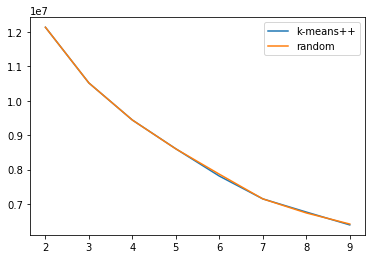

In [71]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,10))).plot()

Their is no outstanding elbow piont, so we will devide rides to 3 categories.

### Step-by-step method without scaling the data

In [72]:
estimator = KMeans(n_clusters=3, init='k-means++')
estimator.fit(clust)

KMeans(n_clusters=3)

Number of rides in the clusters

In [73]:
Counter(estimator.labels_)

Counter({1: 1673704, 2: 334205, 0: 86530})

(3.5, -0.5)

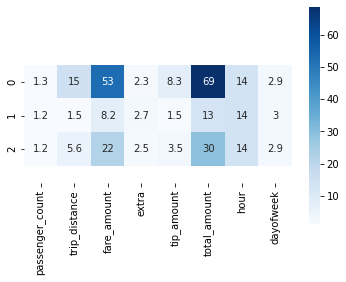

In [74]:
centers = pd.DataFrame(estimator.cluster_centers_)
centers.columns = clust.columns
ax = sns.heatmap(centers, annot=True, cmap='Blues', square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Looks like the centers were influenced by the fare amount and total amount. These two are actually related since a big part of total amount is made up in large part of the fare amount. The others are only contributing a little.

### Do it with a for loop with scaled data

k-means++


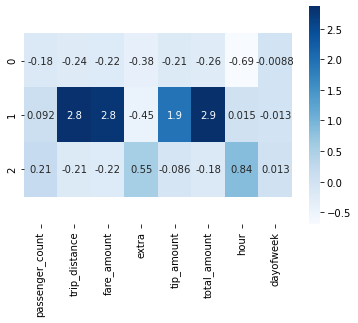

In [75]:
for init_method in ['k-means++']:
    print(init_method)
    estimator = fit_kmeans(data, 3, init_method)
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = clust.columns
    ax = sns.heatmap(centers, annot=True, cmap='Blues')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    

Looks like even here the two most important factors in cluster 1 are fare amount and total amount, but trip distance and tip amount also come into play. In cluster 2 interestinly the two main factors are extra and the hour of the trip. This means there are some important pattern in the hour.

Overall it seems that there are some patterns in the data that could be used to create some form of user profile for taxi rides.